# Graph Representations

## Lesson Overview

Given the wide utility of graphs, it can often be more practical to represent them in memory using different techniques. These different representations depend on the structure and properties of the graph to determine how they are stored in memory.

Two of the most common graph representations are **adjacency lists** and **adjacency matrices**.

### Adjacency lists

In an **adjacency list**, each node is stored as its own object. Inside of that object is a list of adjacent nodes. This allows us to store additional data on the nodes or edges, and we'll see algorithms that use that extra data (for instance, what if the edges had values on them representing distance?).

A common representation is given below. 

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this 
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])


class Graph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def get_nodes(self):
    # Returns a list of nodes stored in the graph.
    return self.node_list

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

---

Consider the following graph.

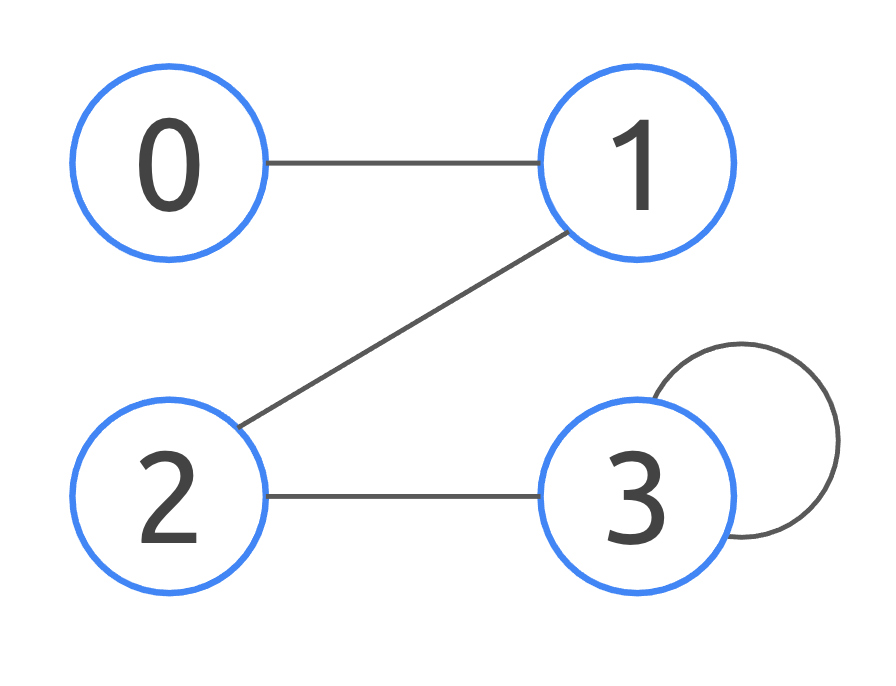

This graph can be represented using an adjacency list as:


In [ ]:
graph_one = Graph()
node_list = [Node(0), Node(1), Node(2), Node(3)]

for node in node_list:
  graph_one.add_node(node)

node_list[1].add_connection(node_list[0])
node_list[2].add_connection(node_list[0])
node_list[2].add_connection(node_list[1])
node_list[3].add_connection(node_list[2])
node_list[3].add_connection(node_list[3])

graph_one.print()

If we wanted to add data on edges, you could create an `Edge` class that contains the two nodes that the edge connects.

### Adjacency matrices

In an **adjacency matrix**, nodes themselves aren't stored; we instead create a two-dimensional array that represents the nodes and place a 1 in any spot where the two 'nodes' in question are connected.

Consider the following graph, where:

1.   $A$ is connected to $A$ and $B$
2.   $B$ is connected to $A$ and $C$
3.   $C$ is connected to $C$
4.   $D$ is connected to $D$

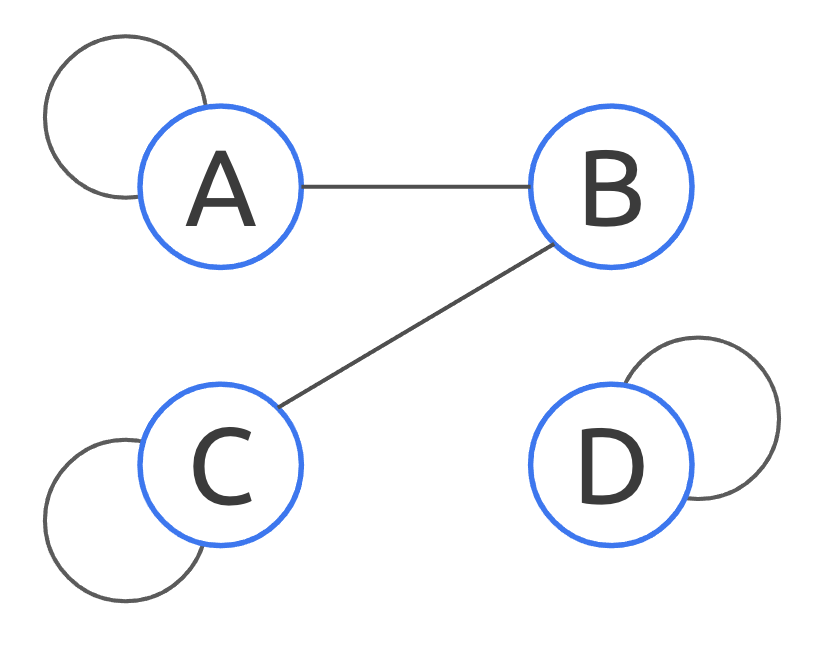

The adjacency matrix would look like:

```python
[
  [1, 1, 0, 0], # This row represents node A's connections.
  [1, 0, 1, 0], # This row represents node B's connections.
  [0, 1, 1, 0], # This row represents node C's connections.
  [0, 0, 0, 1], # This row represents node D's connections.
]
```

The equivalent adjacency list would look like this:

```python
graph_one = Graph()
node_list = [Node('A'), Node('B'), Node('C'), Node('D')]

for node in node_list:
  graph_one.add_node(node)

node_list[0].add_connection(node_list[0])
node_list[0].add_connection(node_list[1])
node_list[1].add_connection(node_list[2])
node_list[2].add_connection(node_list[2])
node_list[3].add_connection(node_list[3])
```

If you wanted to store additional information on the edges, you could instead use edge distance (or cost) rather than 1 or 0. To indicate that two nodes aren't connected, use a -1 rather than a positive integer.

---

This is one possible implementation of adjacency matrices in Python (to distinguish it from an adjacency list implementation, we will refer to these in code as `AMGraph` and `ALGraph`, respectively):

In [ ]:
class AMGraph:
  # Implementation of an adjacency matrix graph.

  num_nodes = 0

  def __init__(self):
    self.node_list = []
  
  def get_nodes(self):
    return self.node_list

  def add_adjacency_row(self, adjacency_row):
    # Add a new node to the graph via an array representing its connections.
    # Adding [1, 1, 0, 1] would add a new node (Node 4) that's connected to 
    # Nodes 1, 2, and 4, for instance, and update Nodes 1 and 2 with that
    # connection.
    # Add the adjacency list itself to the end of our matrix
    self.node_list.append(adjacency_row)
    for i in range(len(adjacency_row) - 1):
      # If a list that's too long gets submitted, we should break out.
      if i == len(self.node_list):
        break
      # Add a new edge to the adjacency list
      self.node_list[i].append(adjacency_row[i])

  @classmethod
  def from_matrix(cls, matrix):
    # This creates a new AMGraph from a user-supplied adjacency matrix.
    new_graph = cls()
    new_graph.node_list = matrix
    return new_graph

In [ ]:
graph_one = AMGraph()
graph_one.add_adjacency_row([0])
graph_one.add_adjacency_row([1, 0])
graph_one.add_adjacency_row([1, 1, 0])
graph_one.add_adjacency_row([0, 0, 1, 1])

for row in graph_one.node_list:
  print(row)

This implementation allows us to append nodes by adding their adjacency lists directly to the matrix.

Adjacency matrices are less commonly used than adjacency lists, primarily because every node-node pair must be represented, which adds to both time and space complexity.

## Question 1

Which of the following statements about an adjacency list are true?

**a)** An adjacency list usually has `Graph` and `Node` classes, but may optionally have an `Edge` class or other classes to track additional information.

**b)** An adjacency list is usually more space efficient than an adjacency matrix for sparse graphs (graphs in which there are not very many connections between nodes).

**c)** An adjacency list cannot store edge information, while an adjacency matrix can.

### Solution

The correct answers are **a)** and **b)**.

**c)** Adjacency lists can be built with an edge class or a variety of other implementations to store information about edges.

## Question 2

Which of the following statements about an adjacency matrix are true?

**a)** An adjacency matrix may never store a number other than 0 or 1 in its rows and columns.

**b)** Adjacency matrices are always square, since any node can be connected to any other node.

**c)** An adjacency matrix for a graph with no edge information uses 0 to signify that two nodes are not connected and 1 to signify that they are.

**d)** Adjacency matrices are typically more space efficient than adjacency lists for dense graphs (graphs in which most nodes are connected to most other nodes).

### Solution

The correct answers are **b)**, **c)**, and **d)**.

**a)** Certain graph implementations use numbers other than 0 or 1 to store the "weight" of an edge (for example, the length of a road between two cities, if the cities were nodes). In such cases, the numbers can be anything, and -1 is often used to indicate that two nodes are not connected.

## Question 3

Which of the following statements about whether real-world graphs would be better implemented as an adjacency list or matrix are true?

**a)** A social network like Twitter is best implemented as an adjacency list, as users generally are not connected to every other user on the site.

**b)** A map of the United States is best represented as an adjacency matrix, as every city is connected to every other city by a vast network of highways.

**c)** A close group of friends is best represented as an adjacency matrix, as each person in the friend group is likely to be friends with each other person in the friend group.

### Solution

The correct answers are **b)** and **c)**.

**b)** While it's true that a *path* exists between every city, it isn't true that a *connection* exists between every city. There isn't a road from San Francisco to every other city in the United States! You'd need to pass through other cities on the way. This is a sparse graph, so it's probably better to represent this as an adjacency list.

## Question 4

Given that both adjacency lists and adjacency matrices have their pros and cons, it's often helpful to have the ability to convert from one format to another.

Write a method for the `ALGraph` (adjacency list) class that returns an `AMGraph` (adjacency matrix) representation of it.

In [ ]:
class ALNode:
  # Implementation of an adjacency list graph node.

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])


class ALGraph:
  # Implementation of an adjacency list graph.

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def get_nodes(self):
    return self.node_list

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
class AMGraph:
  # Implementation of an adjacency matrix graph.

  num_nodes = 0

  def __init__(self):
    self.node_list = []
  
  def get_nodes(self):
    return self.node_list

  def add_adjacency_row(self, adjacency_row):
    # Add the adjacency list itself to the end of our matrix
    self.node_list.append(adjacency_row)
    for i in range(len(adjacency_row) - 1):
      # If a list that's too long gets submitted, we should break out.
      if i == len(self.node_list):
        break
      # Add a new edge to the adjacency list
      self.node_list[i].append(adjacency_row[i])

  @classmethod
  def from_matrix(cls, matrix):
    # This creates a new AMGraph from a user-supplied adjacency matrix.
    new_graph = cls()
    new_graph.node_list = matrix
    return new_graph

In [ ]:
class YourALGraph(ALGraph):

  def to_AMGraph(self):
    # TODO(you): Implement
    print('This method has not been implemented.')

### Hint

Don't forget to add a 0 if there's no connection between the nodes! Depending on how you initialize your rows and columns, you may be able to just pre-set  all the rows and columns to 0, rather than explicitly adding a 0 for each edge that doesn't exist.

Either way, you'll want to start by initializing the matrix and then go through every possible combination of nodes to see if an edge exists, like so:

```python
class YourALGraph(ALGraph):

  def to_AMGraph(self):
    # First, create the adjacency matrix.
    adjacency_matrix = []
    for i in range(len(self.node_list)):
      adjacency_matrix.append([])
      for j in range(len(self.node_list)):
        # Once we've got a pair of nodes, how should we best represent their
        # connection (or lack thereof) in the matrix?
    return AMGraph.from_matrix(adjacency_matrix)
```

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
al_graph_one = YourALGraph()
nodes = [ALNode(0), ALNode(1), ALNode(2), ALNode(3)]
al_graph_one.add_node(nodes[0])
nodes[1].add_connection(nodes[0])
al_graph_one.add_node(nodes[1])
nodes[2].add_connection(nodes[0])
nodes[2].add_connection(nodes[1])
al_graph_one.add_node(nodes[2])
nodes[3].add_connection(nodes[2])
nodes[3].add_connection(nodes[3])
al_graph_one.add_node(nodes[3])
print(al_graph_one.to_AMGraph().get_nodes())
# Should print: [[0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 1]]

al_graph_two = YourALGraph()
nodes = [ALNode(0), ALNode(1), ALNode(2), ALNode(3)]
nodes[0].add_connection(nodes[0])
al_graph_two.add_node(nodes[0])
nodes[1].add_connection(nodes[1])
al_graph_two.add_node(nodes[1])
nodes[2].add_connection(nodes[0])
nodes[2].add_connection(nodes[1])
al_graph_two.add_node(nodes[2])
print(al_graph_two.to_AMGraph().get_nodes())
# Should print: [[1, 0, 1], [0, 1, 1], [1, 1, 0]]

al_graph_three = YourALGraph()
nodes = [ALNode(0), ALNode(1), ALNode(2), ALNode(3)]
nodes[0].add_connection(nodes[0])
al_graph_three.add_node(nodes[0])
nodes[1].add_connection(nodes[0])
al_graph_three.add_node(nodes[1])
nodes[2].add_connection(nodes[0])
al_graph_three.add_node(nodes[2])
nodes[3].add_connection(nodes[1])
nodes[3].add_connection(nodes[2])
al_graph_three.add_node(nodes[3])
print(al_graph_three.to_AMGraph().get_nodes())
# Should print: [[1, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]]

### Solution

To build this, we'll need to build a row for each node in the graph's `node_list` and then mark it with a 1 if it's connected to another node. Remember, we can't guarantee the ordering of the graph's `node_list` or the node's `node_list`, but as long as we're consistent we'll end up with an equivalent graph.

In [ ]:
class YourALGraph(ALGraph):

  def to_AMGraph(self):
    # First, create the adjacency matrix.
    adjacency_matrix = []
    for i in range(len(self.node_list)):
      adjacency_matrix.append([])
      for j in range(len(self.node_list)):
        if self.node_list[j] in self.node_list[i].connected_to:
          adjacency_matrix[i].append(1)
        else:
          adjacency_matrix[i].append(0)
    return AMGraph.from_matrix(adjacency_matrix)

## Question 5

Now that we can convert from an adjacency list to an adjacency matrix, write a method that does the opposite. Given an `AMGraph`, write a `to_ALGraph` method that returns an `ALGraph` representation of the `AMGraph`.



In [ ]:
class ALNode:
  # Implementation of an adjacency list graph node.

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])


class ALGraph:
  # Implementation of an adjacency list graph.

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def get_nodes(self):
    return self.node_list

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
class AMGraph:
  # Implementation of an adjacency matrix graph.

  num_nodes = 0

  def __init__(self):
    self.node_list = []
  
  def get_nodes(self):
    return self.node_list

  def add_adjacency_row(self, adjacency_row):
    # Add the adjacency list itself to the end of our matrix
    self.node_list.append(adjacency_row)
    for i in range(len(adjacency_row) - 1):
      # If a list that's too long gets submitted, we should break out.
      if i == len(self.node_list):
        break
      # Add a new edge to the adjacency list
      self.node_list[i].append(adjacency_row[i])

  @classmethod
  def from_matrix(cls, matrix):
    # This creates a new AMGraph from a user-supplied adjacency matrix.
    new_graph = cls()
    new_graph.node_list = matrix
    return new_graph

In [ ]:
class YourAMGraph(AMGraph):

  def to_ALGraph(self):
    # Returns an ALGraph implementation of an AMGraph.
    # TODO(you): Implement
    print('This method has not been implemented.')

### Hint

The key thing to keep in mind for this one is consistency. Each row in the matrix refers to a node and its edges, so make sure that you're instantiating the correct number of nodes and then recording their edges properly so that you get the same graph.

The best thing you can do is proceed methodically through the matrix and check each spot. If it's a 1, you know an edge is there and should create it in your adjacency list; if it's a 0, you know there's no edge there.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
am_graph_one = YourAMGraph()
am_graph_one.add_adjacency_row([0])
am_graph_one.add_adjacency_row([1, 0])
am_graph_one.add_adjacency_row([1, 1, 0])
am_graph_one.add_adjacency_row([0, 0, 1, 1])
am_graph_one.to_ALGraph().print()
# Should print multiline:
# 0: [1, 2]
# 1: [0, 2]
# 2: [0, 1, 3]
# 3: [2, 3]

am_graph_two = YourAMGraph()
am_graph_two.add_adjacency_row([1])
am_graph_two.add_adjacency_row([0, 1])
am_graph_two.add_adjacency_row([1, 1, 0])
am_graph_two.to_ALGraph().print()
# Should print multiline:
# 0: [0, 2]
# 1: [1, 2]
# 2: [0, 1]

am_graph_three = YourAMGraph()
am_graph_three.add_adjacency_row([1])
am_graph_three.add_adjacency_row([1, 0])
am_graph_three.add_adjacency_row([1, 0, 0])
am_graph_three.add_adjacency_row([0, 1, 1, 0])
am_graph_three.to_ALGraph().print()
# Should print multiline:
# 0: [0, 1, 2]
# 1: [0, 3]
# 2: [0, 3]
# 3: [1, 2]

### Solution

The nodes don't have names (or particularly need them), so start by creating all the nodes, add their connections, and then add them to the graph.

In [ ]:
class YourAMGraph(AMGraph):

  def to_ALGraph(self):
    new_node_list = [ALNode(i) for i in range(len(self.node_list))]
    for i in range(len(self.node_list)):
      row = self.node_list[i]
      for j in range(len(row)):
        potential_edge = row[j]
        if potential_edge:
          new_node_list[i].add_connection(new_node_list[j])
    new_graph = ALGraph()
    for node in new_node_list:
      new_graph.add_node(node)
    return new_graph

## Question 6

Your coworker is working on a router that will help guide traffic from your computer to the internet. They're trying to make sure that their network is robust to changes, and one way that they need to do so is by creating a `remove_node` method for the `ALGraph` class you've already used elsewhere. The method removes an `ALNode` from the graph and removes it from its connectors. Their `remove_node` method is not currently working, though; can you fix it?

In [ ]:
class ALNode:
  # Implementation of an adjacency list graph node.

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def remove_node(self):
    for node in self.connected_to:
      if node == self:
        self.node_list.remove(node)


class ALGraph:
  # Implementation of an adjacency list graph.

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def get_nodes(self):
    return self.node_list

  def remove_node(self, node):
    for other_node in self.node_list:
      if node == other_node:
        self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
graph = ALGraph()
node_list = [ALNode('0'), ALNode('1'), ALNode('2'), ALNode('3'),
         ALNode('4'), ALNode('5'), ALNode('6')]
node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[3])
node_list[0].add_connection(node_list[6])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[4])
node_list[2].add_connection(node_list[5])
node_list[2].add_connection(node_list[6])
node_list[3].add_connection(node_list[6])
node_list[4].add_connection(node_list[6])
node_list[5].add_connection(node_list[6])

for node in node_list:
  graph.add_node(node)

graph.print()
# Should print multiline:
# 0: ['1', '3', '6']
# 1: ['0', '2', '4']
# 2: ['1', '5', '6']
# 3: ['0', '6']
# 4: ['1', '6']
# 5: ['2', '6']
# 6: ['0', '2', '3', '4', '5']

graph.remove_node(node_list[6])

graph.print()
# Should print multiline:
# 0: ['1', '3']
# 1: ['0', '2', '4']
# 2: ['1', '5']
# 3: ['0']
# 4: ['1']
# 5: ['2']

### Solution

So your coworker removed the node from the graph's `node_list`, but forgot to remove the node from the connections! If you try calling the `ALNode`'s `remove_node` method, it also doesn't work. Part of the reason is that the `remove_node` method refers to `node_list` instead of `connected_to`, so that method cannot correctly remove a node. It seems that the `ALNode`'s `remove_node` method got conflated with the `ALGraph`'s `remove_node` method.

Update the graph's `remove_node` method to go through `node_list` and call a corrected version of `remove_node`, one that actually takes in the node to remove.

In [ ]:
class ALNode:
  # Implementation of an adjacency list graph node.

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def remove_node(self, node_to_remove):
    # This method removes node_to_remove from this node's connections.
    if node_to_remove in self.connected_to:
        self.connected_to.remove(node_to_remove)
        
        
class ALGraph:
  # Implementation of an adjacency list graph.

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def get_nodes(self):
    return self.node_list

  def remove_node(self, node):
    if node in self.node_list:
      self.node_list.remove(node)
    for other_node in self.node_list:
      other_node.remove_node(node)

  def print(self):
    for node in self.node_list:
      print(node)